In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [179]:

wine_white = pd.read_csv('~/Desktop/SNB/SNB_23L_projekt_dane/Wine_Quality_MLR/winequality-white.csv', sep=';')
wine_white['type'] = 'white'
wine_red = pd.read_csv('~/Desktop/SNB/SNB_23L_projekt_dane/Wine_Quality_MLR/winequality-red.csv', sep=';')
wine_red['type'] = 'red'

df = pd.concat([wine_white, wine_red]).reset_index(drop=True)

# re-shuffle records just to randomize data points
df = df.sample(frac=1, random_state=64).reset_index(drop=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,6.3,0.98,0.01,2.0,0.057,15.0,33.0,0.99488,3.60,0.46,11.20,6,red
1,6.6,0.34,0.40,8.1,0.046,68.0,170.0,0.99494,3.15,0.50,9.55,6,white
2,7.6,0.23,0.26,15.3,0.067,32.0,166.0,0.99860,3.03,0.44,9.20,4,white
3,6.4,0.28,0.56,1.7,0.156,49.0,106.0,0.99354,3.10,0.37,9.20,6,white
4,5.9,0.26,0.27,18.2,0.048,52.0,168.0,0.99930,3.35,0.44,9.40,5,white


# Exploratory Data Analysis (EDA)

In [162]:
def exploratory_data_analysis(df, pred=None):
    '''
    Returns the types, counts, distinct, count nulls, missing ratio and uniques values of each field/feature.
    '''
    summary = pd.DataFrame({
        'types': df.dtypes,
        'counts': df.count(),
        'distincts': df.nunique(),
        'nulls': df.isnull().sum(),
        'missing_ratio': (df.isnull().sum() / df.shape[0]) * 100,
        'skewness': df.skew(numeric_only=True),
        'kurtosis': df.kurt(numeric_only=True)
    })

    summary['uniques'] = [df[col].unique() for col in df.columns]

    if pred is not None:
        summary['corr'] = df.corr(numeric_only=True).loc[:, pred]
        summary.rename(columns={'corr': f'corr {pred}'}, inplace=True)

    print('Data shape:', df.shape)
    print('___________________________\nData types:\n', summary.types.value_counts())
    print('___________________________')

    return summary

details = exploratory_data_analysis(df, 'quality')
details


Data shape: (6497, 13)
___________________________
Data types:
 float64    11
int64       1
object      1
Name: types, dtype: int64
___________________________


,types,counts,distincts,nulls,missing_ratio,skewness,kurtosis,uniques,corr quality
alcohol,float64,6497,111,0,0.0,0.565718,-0.531687,"[6.3, 6.6, 7.6, 6.4, 5.9, 5.3, 7.5, 6.8, 7.4, ...",0.444319
chlorides,float64,6497,214,0,0.0,5.399828,50.898051,"[0.98, 0.34, 0.23, 0.28, 0.26, 0.32, 0.22, 0.4...",-0.200666
citric acid,float64,6497,89,0,0.0,0.471731,2.397239,"[0.01, 0.4, 0.26, 0.56, 0.27, 0.35, 0.37, 0.11...",0.085532
density,float64,6497,998,0,0.0,0.503602,6.606067,"[2.0, 8.1, 15.3, 1.7, 18.2, 1.6, 15.4, 2.2, 11...",-0.305858
fixed acidity,float64,6497,106,0,0.0,1.723290,5.061161,"[0.057, 0.046, 0.067, 0.156, 0.048, 0.092, 0.0...",-0.076743
free sulfur dioxide,float64,6497,135,0,0.0,1.220066,7.906238,"[15.0, 68.0, 32.0, 49.0, 52.0, 24.0, 62.0, 16....",0.055463
pH,float64,6497,108,0,0.0,0.386839,0.367657,"[33.0, 170.0, 166.0, 106.0, 168.0, 138.0, 153....",0.019506
quality,int64,6497,7,0,0.0,0.189623,0.232322,"[0.99488, 0.99494, 0.9986, 0.99354, 0.9993, 0....",1.000000
residual sugar,float64,6497,316,0,0.0,1.435404,4.359272,"[3.6, 3.15, 3.03, 3.1, 3.35, 3.19, 3.02, 3.54,...",-0.036980
sulphates,float64,6497,111,0,0.0,1.797270,8.653699,"[0.46, 0.5, 0.44, 0.37, 0.4, 0.88, 0.45, 0.42,...",0.038485


## Descriptive Statistics

In [163]:
red_samples = round(df.loc[df.type == 'red', df.columns].describe(),2)
white_samples= round(df.loc[df.type == 'white', df.columns].describe(),2)
pd.concat([red_samples, white_samples], axis=0, keys=['Red Wine Statistics', 'White Wine Statistics']).transpose()

Red Wine Statistics                                    \
                                   count   mean    std   min    25%    50%   
fixed acidity                     1599.0   8.32   1.74  4.60   7.10   7.90   
volatile acidity                  1599.0   0.53   0.18  0.12   0.39   0.52   
citric acid                       1599.0   0.27   0.19  0.00   0.09   0.26   
residual sugar                    1599.0   2.54   1.41  0.90   1.90   2.20   
chlorides                         1599.0   0.09   0.05  0.01   0.07   0.08   
free sulfur dioxide               1599.0  15.87  10.46  1.00   7.00  14.00   
total sulfur dioxide              1599.0  46.47  32.90  6.00  22.00  38.00   
density                           1599.0   1.00   0.00  0.99   1.00   1.00   
pH                                1599.0   3.31   0.15  2.74   3.21   3.31   
sulphates                         1599.0   0.66   0.17  0.33   0.55   0.62   
alcohol                           1599.0  10.42   1.07  8.40   9.50  10.20   
quality                           1599.0   5.64   0.81  3.00   5.00   6.00   

                                    White Wine Statistics                 \
                        75%     max                 count    mean    std   
fixed acidity          9.20   15.90                4898.0    6.85   0.84   
volatile acidity       0.64    1.58                4898.0    0.28   0.10   
citric acid            0.42    1.00                4898.0    0.33   0.12   
residual sugar         2.60   15.50                4898.0    6.39   5.07   
chlorides              0.09    0.61                4898.0    0.05   0.02   
free sulfur dioxide   21.00   72.00                4898.0   35.31  17.01   
total sulfur dioxide  62.00  289.00                4898.0  138.36  42.50   
density                1.00    1.00                4898.0    0.99   0.00   
pH                     3.40    4.01                4898.0    3.19   0.15   
sulphates              0.73    2.00                4898.0    0.49   0.11   
alcohol               11.10   14.90                4898.0   10.51   1.23   
quality                6.00    8.00                4898.0    5.88   0.89   

                                                            
                       min     25%     50%     75%     max  
fixed acidity         3.80    6.30    6.80    7.30   14.20  
volatile acidity      0.08    0.21    0.26    0.32    1.10  
citric acid           0.00    0.27    0.32    0.39    1.66  
residual sugar        0.60    1.70    5.20    9.90   65.80  
chlorides             0.01    0.04    0.04    0.05    0.35  
free sulfur dioxide   2.00   23.00   34.00   46.00  289.00  
total sulfur dioxide  9.00  108.00  134.00  167.00  440.00  
density               0.99    0.99    0.99    1.00    1.04  
pH                    2.72    3.09    3.18    3.28    3.82  
sulphates             0.22    0.41    0.47    0.55    1.08  
alcohol               8.00    9.50   10.40   11.40   14.20  
quality               3.00    5.00    6.00    6.00    9.00

The following are the highlights from the descriptive statistics presented above:

- The mean residual sugar and total sulfur dioxide content in white wine appears to be significantly higher than in red wine.
- Red wine has higher mean values of sulphates, fixed acidity, and volatile acidity compared to white wine.
- Citric acid is more commonly found in white wine than in red wine, as indicated by all of the numbers.
- Overall, white wines have roughly half the concentration of chlorides as red wines.
- Although the difference appears to be small, it is worth noting that the pH value is slightly higher in green red wines.

In [164]:

df['quality_label'] = df.quality.apply(lambda q: 'low' if q <= 5 else 'medium' if q <= 7 else 'high')

low_samples = round(df[df['quality_label'] == 'low'][df.columns].describe(),2)
medium_samples= round(df[df['quality_label'] == 'medium'][df.columns].describe(),2)
high_samples = round(df[df['quality_label'] == 'high'][df.columns].describe(),2)
pd.concat([low_samples, medium_samples, high_samples], axis=0, keys=['Low Quality Wine', 'Medium Quality Wine', 'High Quality Wine']).transpose()

Low Quality Wine                                      \
                                count    mean    std   min    25%     50%   
fixed acidity                  2384.0    7.33   1.27  4.20   6.50    7.10   
volatile acidity               2384.0    0.40   0.19  0.10   0.26    0.34   
citric acid                    2384.0    0.30   0.16  0.00   0.21    0.30   
residual sugar                 2384.0    5.65   4.92  0.60   1.80    2.90   
chlorides                      2384.0    0.06   0.04  0.01   0.04    0.05   
free sulfur dioxide            2384.0   29.48  19.84  2.00  14.00   26.00   
total sulfur dioxide           2384.0  119.28  61.89  6.00  68.00  124.00   
density                        2384.0    1.00   0.00  0.99   0.99    1.00   
pH                             2384.0    3.21   0.16  2.74   3.11    3.20   
sulphates                      2384.0    0.52   0.14  0.25   0.44    0.50   
alcohol                        2384.0    9.87   0.84  8.00   9.30    9.60   
quality                        2384.0    4.88   0.36  3.00   5.00    5.00   

                                     Medium Quality Wine          ...          \
                         75%     max               count    mean  ...     75%   
fixed acidity           7.80   15.90              3915.0    7.16  ...    7.60   
volatile acidity        0.50    1.58              3915.0    0.31  ...    0.36   
citric acid             0.40    1.00              3915.0    0.33  ...    0.39   
residual sugar          8.52   23.50              3915.0    5.32  ...    7.90   
chlorides               0.08    0.61              3915.0    0.05  ...    0.06   
free sulfur dioxide    42.00  289.00              3915.0   30.96  ...   41.00   
total sulfur dioxide  167.00  440.00              3915.0  113.51  ...  150.00   
density                 1.00    1.00              3915.0    0.99  ...    1.00   
pH                      3.31    3.90              3915.0    3.22  ...    3.33   
sulphates               0.58    2.00              3915.0    0.54  ...    0.61   
alcohol                10.40   14.90              3915.0   10.81  ...   11.70   
quality                 5.00    5.00              3915.0    6.28  ...    7.00   

                             High Quality Wine                               \
                         max             count    mean    std    min    25%   
fixed acidity          15.60             198.0    6.85   1.14   3.90   6.20   
volatile acidity        1.04             198.0    0.29   0.12   0.12   0.21   
citric acid             1.66             198.0    0.33   0.10   0.03   0.28   
residual sugar         65.80             198.0    5.35   4.16   0.80   2.00   
chlorides               0.42             198.0    0.04   0.02   0.01   0.03   
free sulfur dioxide   112.00             198.0   34.51  17.08   3.00  24.00   
total sulfur dioxide  294.00             198.0  117.48  41.69  12.00  96.00   
density                 1.04             198.0    0.99   0.00   0.99   0.99   
pH                      4.01             198.0    3.23   0.16   2.88   3.13   
sulphates               1.95             198.0    0.51   0.16   0.25   0.38   
alcohol                14.20             198.0   11.69   1.27   8.50  11.00   
quality                 7.00             198.0    8.03   0.16   8.00   8.00   

                                              
                         50%     75%     max  
fixed acidity           6.80    7.30   12.60  
volatile acidity        0.28    0.35    0.85  
citric acid             0.32    0.37    0.74  
residual sugar          4.05    7.57   14.80  
chlorides               0.04    0.04    0.12  
free sulfur dioxide    34.00   43.00  105.00  
total sulfur dioxide  118.50  145.00  212.50  
density                 0.99    0.99    1.00  
pH                      3.23    3.33    3.72  
sulphates               0.48    0.60    1.10  
alcohol                12.00   12.60   14.00  
quality                 8.00    8.00    9.00  

[12 rows x 24 columns]

Here are the highlights from the descriptive statistics of quality perspective presented above:

- It is interesting to note that alcohol content alone does not provide a significant distinction between white and red wines. However, it does have a noticeable impact on quality. On average, the alcohol concentration increases by about 1% for each quality level, with higher quality wines having higher alcohol content. Lower quality wines have the lowest standard deviation in alcohol concentration.
- Wines of higher quality tend to have lower levels of chlorides and volatile acidity. Additionally, the standard deviation of these two factors is smaller in higher quality wines.
- Free sulfur dioxide content is generally higher in wines of higher quality, but their standard deviation decreases as the quality increases.
- Mean quality wines have slightly higher standard deviation in fixed acidity, but overall, higher quality wines tend to have less fixed acidity.

## Analysis of variance (ANOVA)

In [165]:
from scipy.stats import f_oneway

def anova_test(df, feature, category_col, categories):
    print(f"ANOVA test across wine samples with different {category_col}s:")
    
    samples = [df[df[category_col] == cat][feature] for cat in categories]
    F, p = f_oneway(*samples)
    
    if p <= 0.05:
        msg = 'Reject'
    else:
        msg = 'Accept'
    
    print('F Statistic: {:.2f} \tp-value: {:.3f} \tNull Hypothesis: {}'.format(F, p, msg))
    print()

for feature in df.columns:
    anova_test(df, feature, 'type', ['red', 'white'])


ANOVA test across wine samples with different types:
F Statistic: 2016.51 	p-value: 0.000 	Null Hypothesis: Reject

ANOVA test across wine samples with different types:
F Statistic: 4829.32 	p-value: 0.000 	Null Hypothesis: Reject

ANOVA test across wine samples with different types:
F Statistic: 236.39 	p-value: 0.000 	Null Hypothesis: Reject

ANOVA test across wine samples with different types:
F Statistic: 899.77 	p-value: 0.000 	Null Hypothesis: Reject

ANOVA test across wine samples with different types:
F Statistic: 2315.83 	p-value: 0.000 	Null Hypothesis: Reject

ANOVA test across wine samples with different types:
F Statistic: 1858.14 	p-value: 0.000 	Null Hypothesis: Reject

ANOVA test across wine samples with different types:
F Statistic: 6252.80 	p-value: 0.000 	Null Hypothesis: Reject

ANOVA test across wine samples with different types:
F Statistic: 1169.66 	p-value: 0.000 	Null Hypothesis: Reject

ANOVA test across wine samples with different types:
F Statistic: 789.05 	

ValueError: could not convert string to float: 'red'

# 

## Checking for outliers

IndexError: index 12 is out of bounds for axis 0 with size 12

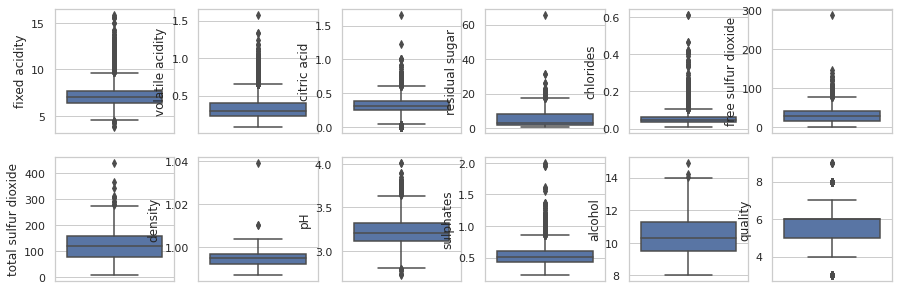

In [166]:
fig, ax = plt.subplots(nrows=2, ncols=6, figsize=(15,5))
ax = ax.flatten()
idx = 0
for attribute in df.columns:
    if attribute != 'quallity':
        sns.boxplot(ax=ax[idx], y=df[attribute])
        idx += 1
plt.tight_layout(pad=0.4)
sns.set_style('whitegrid')

## Data cleaning

### Check for missing values

In [185]:
plt.figure(figsize=(10,8))
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

<Figure size 720x576 with 0 Axes>

Dataset has no missing values. If there were any, you would've noticed in figure represented by different colour shade on green background.

### Check for duplicate rows

In [186]:
df.duplicated().sum()
plt.figure(figsize=(10,8))
sns.heatmap(df.duplicated(), cbar=False, yticklabels=False, cmap='crest', annot=False)

IndexError: Inconsistent shape between the condition and the input (got (6497, 1) and (6497,))

<Figure size 720x576 with 0 Axes>

In [183]:
# for _, d in df.groupby(list(df.columns)):
#     if len(d) > 1:
#         display(d)



In [187]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='duplicated', palette=['#1f77b4', '#ff7f0e'])
plt.xlabel('Duplicated based on columns A and B')
plt.ylabel('Count')
plt.title('Count of Duplicated and Unique Rows')
plt.xticks([0, 1], ['Unique', 'Duplicated'])
plt.show()

ValueError: Could not interpret input 'duplicated'

<Figure size 576x360 with 0 Axes>

## Distributions of the data in the qualities by wine types

Once we have dealt with the null values, we will examine the data distributions of the different quality types. We will then confirm the class imbalance, particularly with regards to the scarcity of high-quality cases.

Imbalance between classes:
 quality     3      4       5       6      7      8    9
type                                                   
red      10.0   53.0   681.0   638.0  199.0   18.0  NaN
white    20.0  163.0  1457.0  2198.0  880.0  175.0  5.0


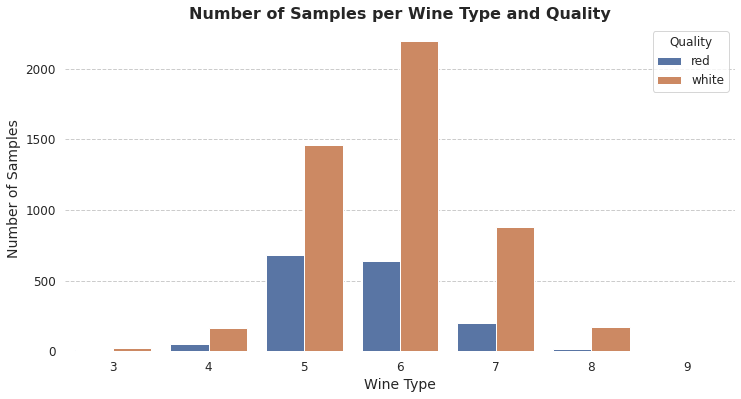

In [168]:
def check_imbalance_plot(df, quality_col='quality', type_col='type'):
    '''
    Checks for class imbalances in the 'quality' column and plots a bar chart ordered by the type of wine.
    '''
    imbalance = df.groupby([type_col, quality_col]).size().unstack()
    print("Imbalance between classes:\n", imbalance)

    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(data=df, x=quality_col, hue=type_col)
    plt.title("Number of Samples per Wine Type and Quality", fontsize=16, fontweight='bold')
    plt.ylabel("Number of Samples", fontsize=14)
    plt.xlabel("Wine Type", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(title="Quality", title_fontsize=12, fontsize=12, loc='upper right')

    # Customize grid and spines
    sns.despine(left=True, bottom=True)
    ax.yaxis.grid(True, linestyle='--', linewidth=1)

    plt.show()
   
check_imbalance_plot(df)


## Check for correlations based on wines types

Text(0.5, 1.0, 'Corelation Matrix -- white and red wines')

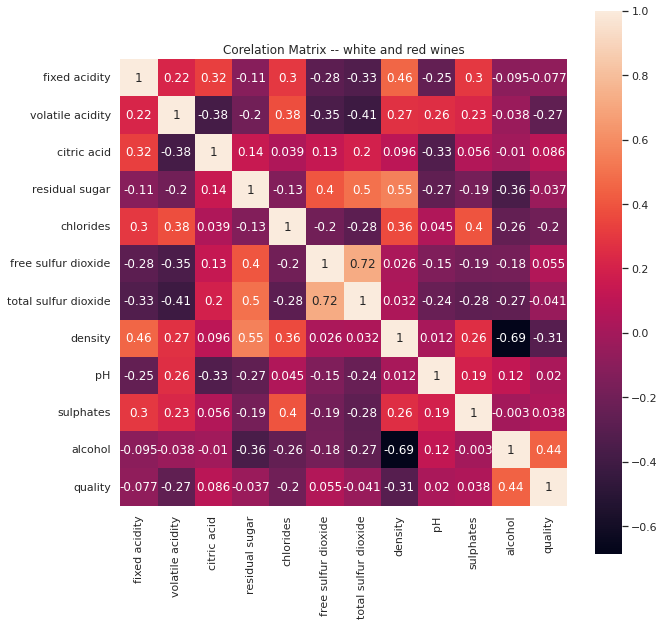

In [169]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, square=True)
plt.title('Corelation Matrix -- white and red wines')

In [170]:
print('Another (more clear) view of correlations among features:\n')
df.corr(numeric_only=True).style.background_gradient(cmap="coolwarm")

Another (more clear) view of correlations among features:



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


While most of the correlations are weak, we can see that:

- Total and free sulfur dioxide has the higest correlation with white wines and each other. In fact, the second is a parcel of the fisrt and it is represent a colinearity that can be a problamem for linear classifiers, special if the target will predict the color, in that case we need drop the free sulfur dioxide.
- The residual sugar has a half relation to the total sulfur dioxide and 0.40 with free, it is a god indication that wich more residual sugar more sulfur dioxide is added by the winemaker. The 0.5 indicates that white wine tend to have more residual sugar then red wine.
- Densite has a relatively high positive correlation to residual sugar and relatively high negative correlation to alcohol.
- The chlorides and volatile acidity has -0.51 and -0,65 correlations between color, indicate a tendency to red wines classification.



Text(0.5, 1.0, 'Corelation Matrix -- red wine')

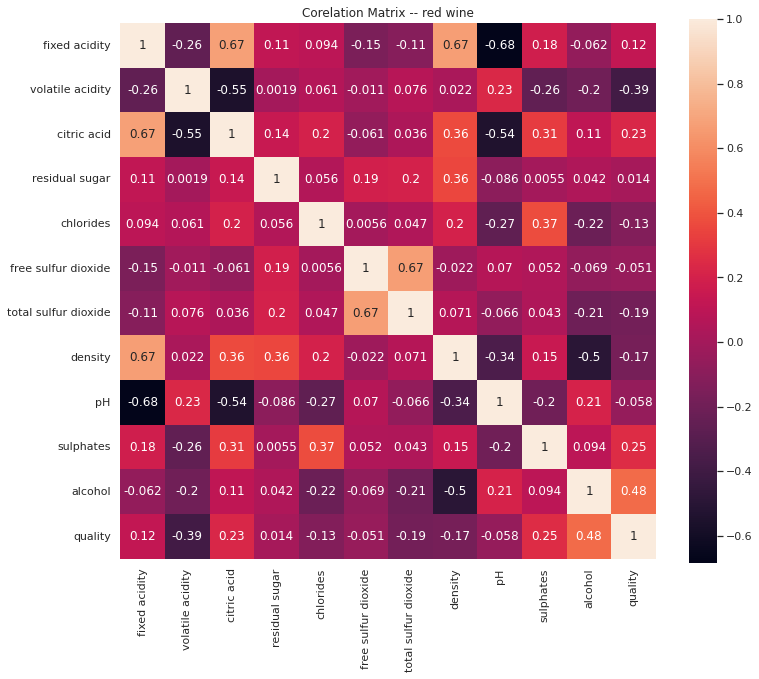

In [171]:
plt.figure(figsize=(12,10))
sns.heatmap(df.query('type == "red"').corr(numeric_only=True), annot=True, square=True)
plt.title('Corelation Matrix -- red wine')

Text(0.5, 1.0, 'Corelation Matrix -- white wine')

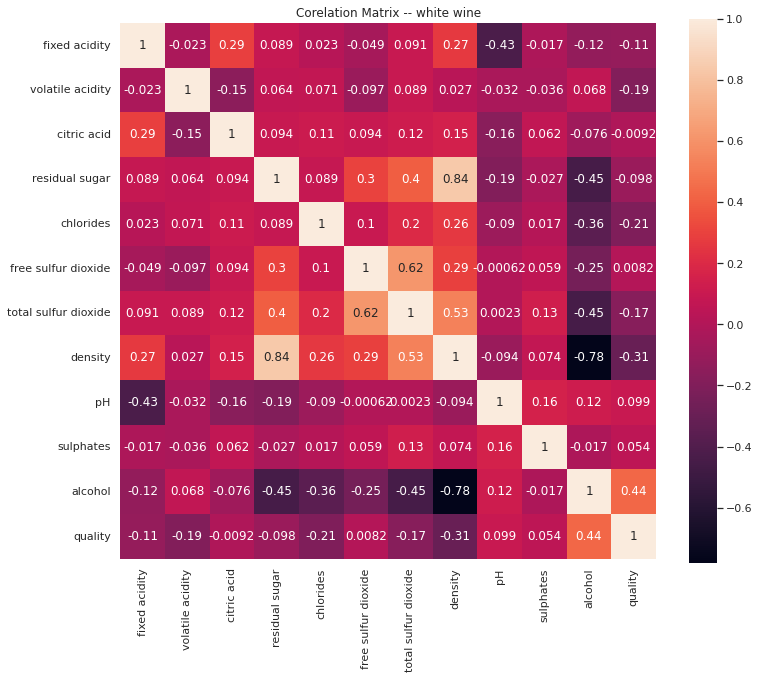

In [172]:
plt.figure(figsize=(12,10))
sns.heatmap(df.query('type == "white"').corr(numeric_only=True), annot=True, square=True)
plt.title('Corelation Matrix -- white wine')